# Explore here

In [34]:
import os
from dotenv import load_dotenv

load_dotenv()

database_url = os.getenv('DATABASE_URL') 

First few rows of the DataFrame:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Columns in the DataFrame:
Index(['age', 

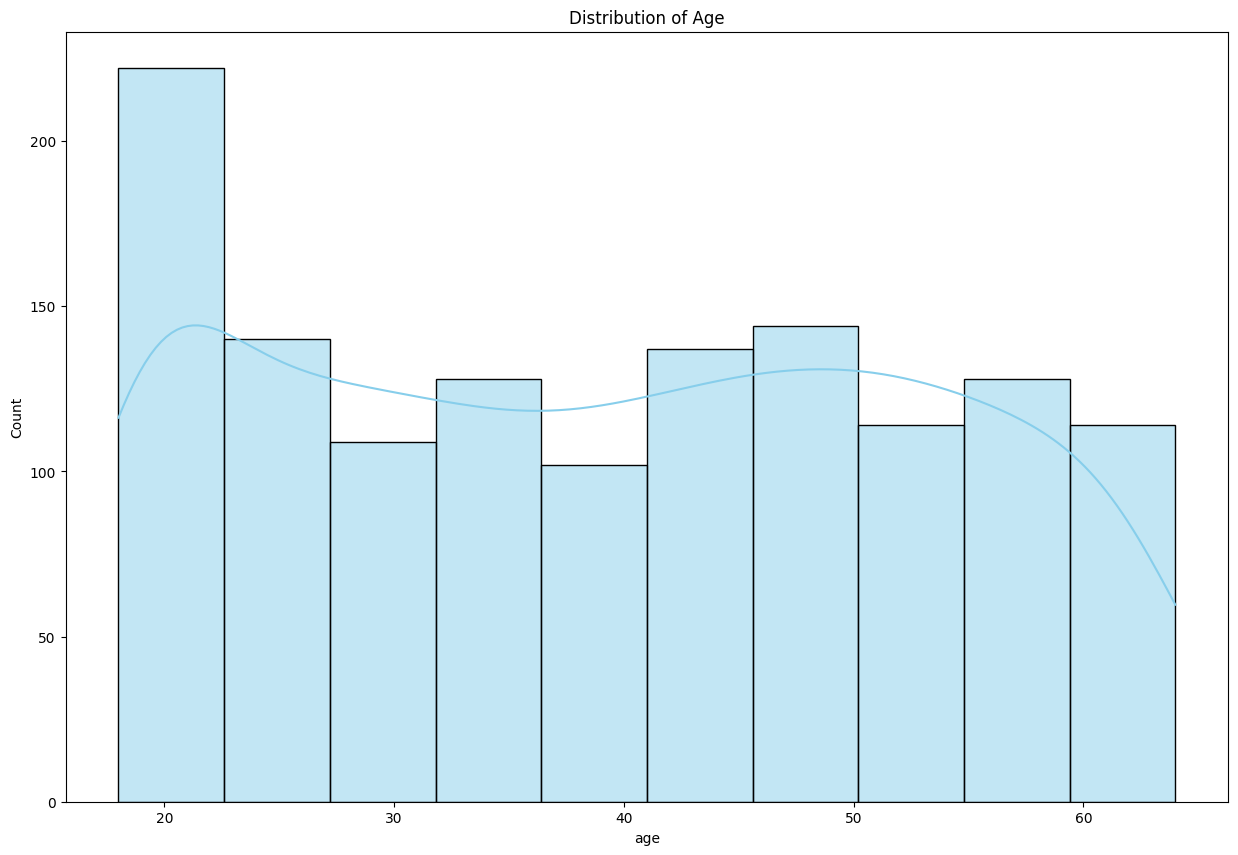

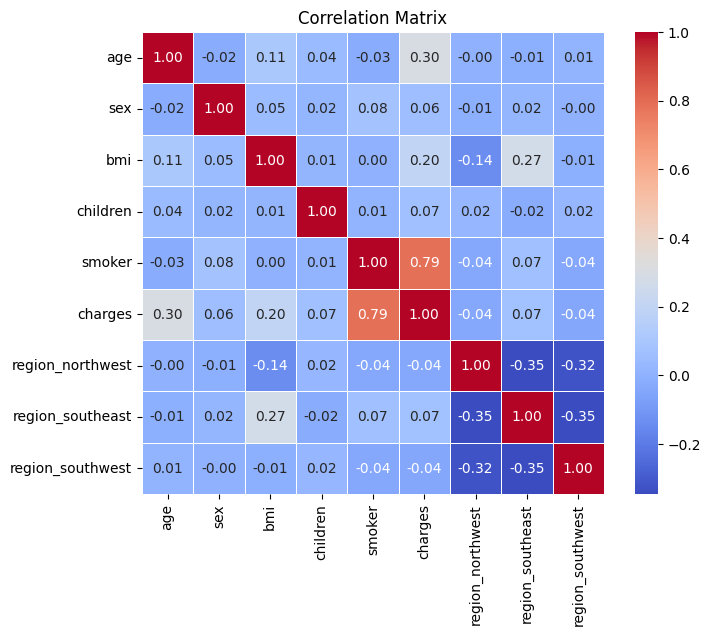

In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Load the dataset from the specified URL
data_url = os.getenv('DATA_URL', 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
data = pd.read_csv(data_url)

# Check if the DataFrame is loaded correctly
if data.empty:
    raise ValueError("The DataFrame is empty. Please check the data source.")

# Display the first few rows and the structure of the DataFrame
print("First few rows of the DataFrame:")
print(data.head())
print("\nDataFrame info:")
print(data.info())

# Check the columns of the DataFrame
print("\nColumns in the DataFrame:")
print(data.columns)

# Convert categorical variables to numeric using label encoding
if 'sex' in data.columns and 'smoker' in data.columns:
    data['sex'] = data['sex'].map({'female': 0, 'male': 1})
    data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
else:
    raise ValueError("Expected categorical columns 'sex' or 'smoker' not found in DataFrame.")

# One-hot encoding for region if it exists
if 'region' in data.columns:
    data = pd.get_dummies(data, columns=['region'], drop_first=True)
else:
    raise ValueError("Expected column 'region' not found in DataFrame.")

# After manipulation, check the DataFrame again
print("\nDataFrame after preprocessing:")
print(data.head())
print("\nDataFrame info after preprocessing:")
print(data.info())

# Step 1: Data Overview
print(f"\nDataset shape: {data.shape}")

# Step 2: Statistical Summary
try:
    print("\nStatistical Summary:")
    print(data.describe())
except ValueError as e:
    print(f"Error during describe: {e}")

# Step 3: Data Visualization
plt.figure(figsize=(15, 10))
sns.histplot(data['age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.show()

# Step 4: Correlation Analysis
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


/tmp/ipykernel_685/478252872.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='charges', data=data, palette='pastel')
/tmp/ipykernel_685/478252872.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=data, palette='pastel')
/tmp/ipykernel_685/478252872.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region_northwest', y='charges', data=data, palette='pastel')
/tmp/ipykernel_685/478252872.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v

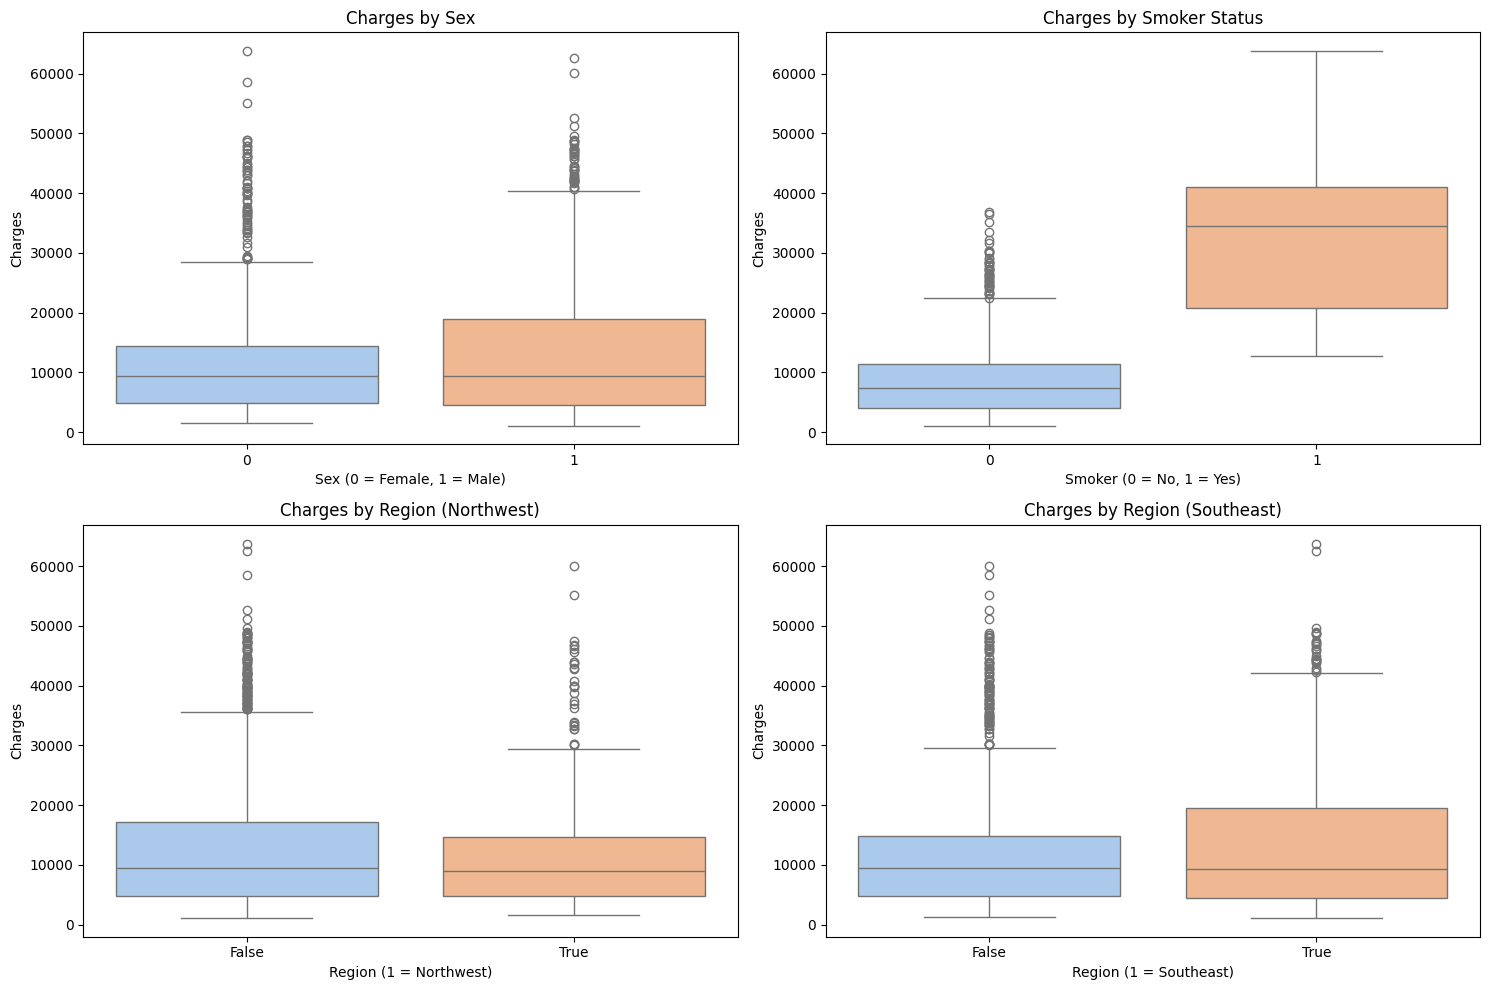

In [36]:
# Step 5: Visualizing Categorical Variables (Updated)

plt.figure(figsize=(15, 10))

# Box plot for Charges by Sex
plt.subplot(2, 2, 1)
sns.boxplot(x='sex', y='charges', data=data, palette='pastel')
plt.title('Charges by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Charges')

# Box plot for Charges by Smoker Status
plt.subplot(2, 2, 2)
sns.boxplot(x='smoker', y='charges', data=data, palette='pastel')
plt.title('Charges by Smoker Status')
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Charges')

# Box plot for Charges by Region (Northwest)
plt.subplot(2, 2, 3)
sns.boxplot(x='region_northwest', y='charges', data=data, palette='pastel')
plt.title('Charges by Region (Northwest)')
plt.xlabel('Region (1 = Northwest)')
plt.ylabel('Charges')

# Box plot for Charges by Region (Southeast)
plt.subplot(2, 2, 4)
sns.boxplot(x='region_southeast', y='charges', data=data, palette='pastel')
plt.title('Charges by Region (Southeast)')
plt.xlabel('Region (1 = Southeast)')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()


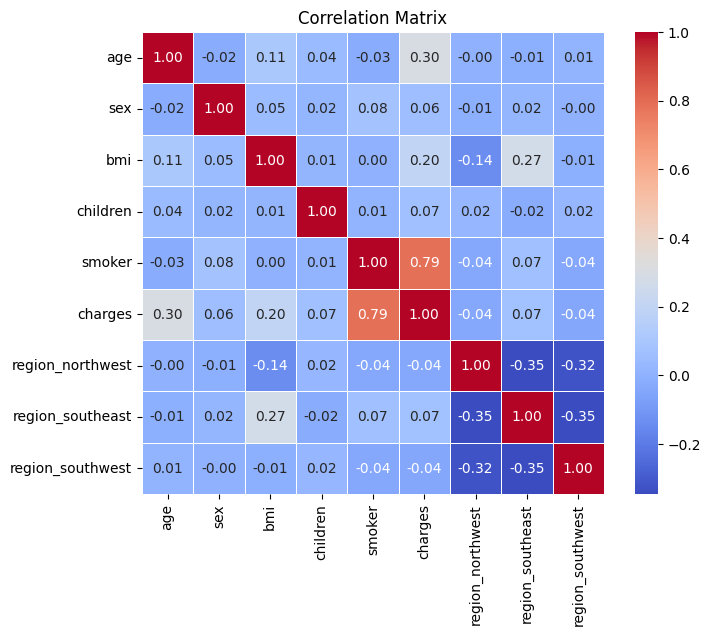

Key Correlations with Charges:
charges             1.000000
smoker              0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex                 0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64


In [37]:
# Step 6: Analyzing Correlations (Revisiting)

# Correlation matrix for numeric variables
correlation_matrix = data.corr()

# Displaying the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Focus on key correlations
print("Key Correlations with Charges:")
print(correlation_matrix['charges'].sort_values(ascending=False))


In [38]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'
df = pd.read_csv(url)

# Display the first few rows
print(df.head())

# Display dataset information
print(df.info())

# Check for missing values
print(df.isnull().sum())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges

In [39]:
import pandas as pd
# One-hot encoding for 'sex' and 'region'
df = pd.get_dummies(df, columns=['sex', 'region'], drop_first=True)

# Encoding 'smoker' as binary
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('charges', axis=1))

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df.drop('charges', axis=1).columns)
df_scaled['charges'] = df['charges']


In [41]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df_scaled.drop('charges', axis=1)
y = df_scaled['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 1070
Testing set size: 268


In [42]:
# Step 1: Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 2: Initialize the model
model = LinearRegression()

# Step 3: Train the model
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 33596915.85
Mean Absolute Error (MAE): 4181.19
R-squared (R2): 0.78


In [43]:
from sklearn.preprocessing import PolynomialFeatures

# Apply polynomial transformation with degree 2 (you can try higher degrees too)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Re-train the model with polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Make predictions and evaluate
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial MSE: {mse_poly:.2f}")
print(f"Polynomial MAE: {mae_poly:.2f}")
print(f"Polynomial R-squared: {r2_poly:.2f}")


Polynomial MSE: 20712459.51
Polynomial MAE: 2729.10
Polynomial R-squared: 0.87


In [44]:
from sklearn.feature_selection import RFE

# Initialize RFE with linear regression
selector = RFE(LinearRegression(), n_features_to_select=5)  # Set number of features to keep
selector.fit(X_train, y_train)

# Transform the dataset to keep selected features
X_train_rfe = selector.transform(X_train)
X_test_rfe = selector.transform(X_test)

# Train and evaluate the model again
model_rfe = LinearRegression()
model_rfe.fit(X_train_rfe, y_train)

# Make predictions and evaluate
y_pred_rfe = model_rfe.predict(X_test_rfe)
mse_rfe = mean_squared_error(y_test, y_pred_rfe)
mae_rfe = mean_absolute_error(y_test, y_pred_rfe)
r2_rfe = r2_score(y_test, y_pred_rfe)

print(f"RFE MSE: {mse_rfe:.2f}")
print(f"RFE MAE: {mae_rfe:.2f}")
print(f"RFE R-squared: {r2_rfe:.2f}")


RFE MSE: 33933328.27
RFE MAE: 4211.16
RFE R-squared: 0.78


In [45]:
from sklearn.preprocessing import StandardScaler

# Scale the training and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Re-train with scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred_scaled = model_scaled.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"Scaled MSE: {mse_scaled:.2f}")
print(f"Scaled MAE: {mae_scaled:.2f}")
print(f"Scaled R-squared: {r2_scaled:.2f}")


Scaled MSE: 33596915.85
Scaled MAE: 4181.19
Scaled R-squared: 0.78


In [46]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the best-performing model (e.g., model_rfe, model_poly, etc.)
cv_scores = cross_val_score(model_rfe, X_train_rfe, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate average MSE from cross-validation
cv_mse = -cv_scores.mean()
print(f"Cross-validated MSE: {cv_mse:.2f}")


Cross-validated MSE: 37745952.18


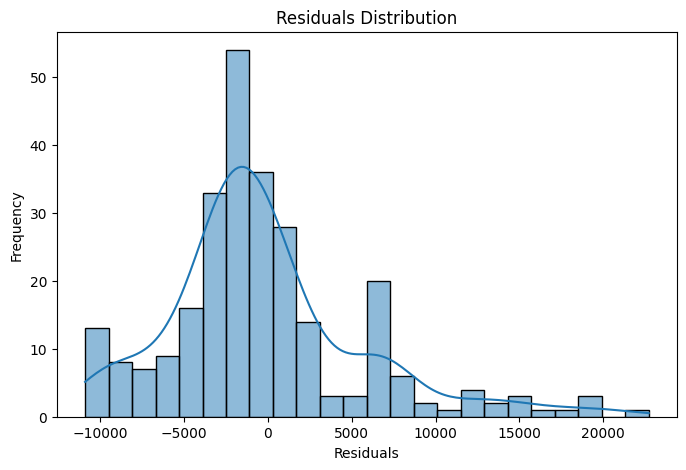

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred_rfe  # Use predictions from the best model, e.g., model_rfe

# Plot residuals distribution
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


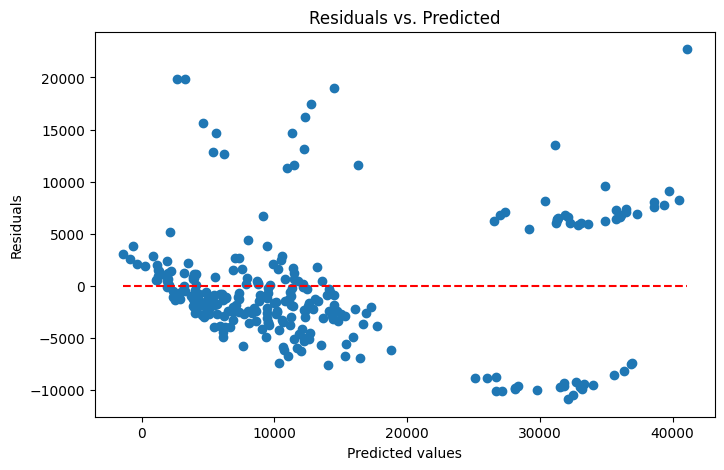

In [48]:
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_rfe, residuals)
plt.hlines(y=0, xmin=y_pred_rfe.min(), xmax=y_pred_rfe.max(), colors='red', linestyles='dashed')
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()


In [49]:
# Display coefficients of the best model (e.g., model_rfe)
coefficients = pd.DataFrame({
    'Feature': X_train.columns[selector.support_],  # features selected by RFE
    'Coefficient': model_rfe.coef_
})

print(coefficients)


            Feature  Coefficient
0               age  3614.428034
1               bmi  1998.102703
2          children   514.170842
3            smoker  9538.637782
4  region_southwest  -197.326016


In [50]:
# Final evaluation on the test set with the best model (e.g., model_rfe)
y_final_pred = model_rfe.predict(X_test_rfe)

final_mse = mean_squared_error(y_test, y_final_pred)
final_mae = mean_absolute_error(y_test, y_final_pred)
final_r2 = r2_score(y_test, y_final_pred)

print(f"Final Test Set MSE: {final_mse:.2f}")
print(f"Final Test Set MAE: {final_mae:.2f}")
print(f"Final Test Set R-squared: {final_r2:.2f}")


Final Test Set MSE: 33933328.27
Final Test Set MAE: 4211.16
Final Test Set R-squared: 0.78


In [51]:
import joblib

# Save the model to a file
joblib.dump(model_rfe, 'final_linear_model.pkl')


['final_linear_model.pkl']

In [52]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

# Initialize Ridge and Lasso with a range of alpha values
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# Train and evaluate using cross-validation
ridge_cv_scores = cross_val_score(ridge_model, X_train_rfe, y_train, cv=5, scoring='neg_mean_squared_error')
lasso_cv_scores = cross_val_score(lasso_model, X_train_rfe, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"Ridge CV MSE: {-ridge_cv_scores.mean():.2f}")
print(f"Lasso CV MSE: {-lasso_cv_scores.mean():.2f}")


Ridge CV MSE: 37745241.51
Lasso CV MSE: 37745945.65


In [53]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define a range of alpha values for Ridge and Lasso
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Grid Search for Ridge Regression
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_rfe, y_train)

# Grid Search for Lasso Regression
lasso_grid = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_rfe, y_train)

# Retrieve the best alpha values
best_ridge_alpha = ridge_grid.best_params_['alpha']
best_lasso_alpha = lasso_grid.best_params_['alpha']

# Initialize Ridge and Lasso models with the best alpha values
ridge_best = Ridge(alpha=best_ridge_alpha)
lasso_best = Lasso(alpha=best_lasso_alpha)

# Retrain Ridge model on the entire training set
ridge_best.fit(X_train_rfe, y_train)
y_ridge_pred = ridge_best.predict(X_test_rfe)

# Evaluate Ridge model on the test set
ridge_mse = mean_squared_error(y_test, y_ridge_pred)
ridge_mae = mean_absolute_error(y_test, y_ridge_pred)
ridge_r2 = r2_score(y_test, y_ridge_pred)

print("Ridge Regression Evaluation on Test Set")
print(f"Best Alpha: {best_ridge_alpha}")
print(f"MSE: {ridge_mse:.2f}")
print(f"MAE: {ridge_mae:.2f}")
print(f"R-squared: {ridge_r2:.2f}\n")

# Retrain Lasso model on the entire training set
lasso_best.fit(X_train_rfe, y_train)
y_lasso_pred = lasso_best.predict(X_test_rfe)

# Evaluate Lasso model on the test set
lasso_mse = mean_squared_error(y_test, y_lasso_pred)
lasso_mae = mean_absolute_error(y_test, y_lasso_pred)
lasso_r2 = r2_score(y_test, y_lasso_pred)

print("Lasso Regression Evaluation on Test Set")
print(f"Best Alpha: {best_lasso_alpha}")
print(f"MSE: {lasso_mse:.2f}")
print(f"MAE: {lasso_mae:.2f}")
print(f"R-squared: {lasso_r2:.2f}")



Ridge Regression Evaluation on Test Set
Best Alpha: 1
MSE: 33938920.78
MAE: 4212.57
R-squared: 0.78

Lasso Regression Evaluation on Test Set
Best Alpha: 10
MSE: 33943744.39
MAE: 4210.73
R-squared: 0.78


Ridge Regression
MSE: 33,938,920.78
MAE: 4,212.57
R-squared: 0.78
Lasso Regression
MSE: 33,943,744.39
MAE: 4,210.73
R-squared: 0.78
Analysis
MSE: Both models have very similar MSE values, with Ridge having a slightly lower MSE (by about 5,000). This difference is minimal and likely negligible in practice.
MAE: Lasso has a slightly lower MAE than Ridge by about 2 units, which is again a minimal difference.
R-squared: Both models have an identical R² of 0.78, indicating that they explain 78% of the variance in the target variable.
Conclusion
The performance of both models is very similar. However, Ridge Regression has a marginally lower MSE, and Lasso Regression has a marginally lower MAE. Given that these differences are quite small, either model would be suitable based on these metrics.

If you prefer slightly lower prediction errors, Ridge Regression would be a reasonable choice due to its slightly lower MSE. However, either model could be used in this case since the differences are not substantial.

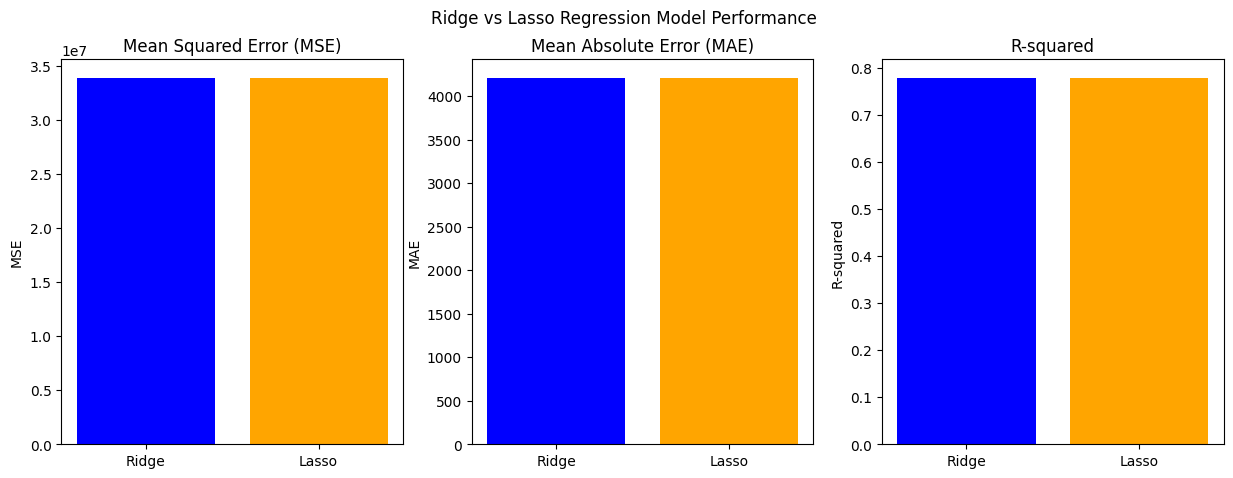

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation metrics for Ridge and Lasso
metrics = {
    'Ridge': {'MSE': 33938920.78, 'MAE': 4212.57, 'R-squared': 0.78},
    'Lasso': {'MSE': 33943744.39, 'MAE': 4210.73, 'R-squared': 0.78}
}

# Separate data for plotting
models = list(metrics.keys())
mse_values = [metrics[model]['MSE'] for model in models]
mae_values = [metrics[model]['MAE'] for model in models]
r2_values = [metrics[model]['R-squared'] for model in models]

# Plotting the metrics
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# MSE Plot
ax[0].bar(models, mse_values, color=['blue', 'orange'])
ax[0].set_title('Mean Squared Error (MSE)')
ax[0].set_ylabel('MSE')

# MAE Plot
ax[1].bar(models, mae_values, color=['blue', 'orange'])
ax[1].set_title('Mean Absolute Error (MAE)')
ax[1].set_ylabel('MAE')

# R-squared Plot
ax[2].bar(models, r2_values, color=['blue', 'orange'])
ax[2].set_title('R-squared')
ax[2].set_ylabel('R-squared')

# Display the chart
plt.suptitle('Ridge vs Lasso Regression Model Performance')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Define a function to calculate MSE for a given alpha
def calculate_mse(alpha, model_type, X_train, y_train, X_test, y_test):
    if model_type == 'ridge':
        model = Ridge(alpha=alpha)
    elif model_type == 'lasso':
        model = Lasso(alpha=alpha)
    else:
        raise ValueError("model_type must be 'ridge' or 'lasso'")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

# Define function to plot MSE vs. alpha
def plot_mse_vs_alpha(alpha_value, model_type, show_tangent_line):
    # Create a range of alpha values for plotting
    alphas = np.linspace(0.01, 20, 100)
    
    # Calculate MSE for each alpha value
    mses = [calculate_mse(alpha, model_type, X_train_rfe, y_train, X_test_rfe, y_test) for alpha in alphas]
    
    # Plot MSE vs. alpha
    plt.figure(figsize=(9, 5))
    plt.plot(alphas, mses, label=f'MSE vs. alpha ({model_type.capitalize()})')
    
    # Plot the specific alpha value as a point
    selected_mse = calculate_mse(alpha_value, model_type, X_train_rfe, y_train, X_test_rfe, y_test)
    plt.plot(alpha_value, selected_mse, 'o', markersize=8, color='black', label=f'Selected alpha = {alpha_value}')
    
    if show_tangent_line:
        # Calculate the slope of the tangent line (approximate derivative)
        epsilon = 0.01
        mse_left = calculate_mse(alpha_value - epsilon, model_type, X_train_rfe, y_train, X_test_rfe, y_test)
        mse_right = calculate_mse(alpha_value + epsilon, model_type, X_train_rfe, y_train, X_test_rfe, y_test)
        slope = (mse_right - mse_left) / (2 * epsilon)
        
        # Plot the tangent line
        tangent_x = np.linspace(alpha_value - 2, alpha_value + 2, 100)
        tangent_y = slope * (tangent_x - alpha_value) + selected_mse
        plt.plot(tangent_x, tangent_y, 'r--', label='Tangent Line')
    
    plt.xlabel(r'$\alpha$')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title(f'MSE vs. Regularization Strength for {model_type.capitalize()}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define sliders and checkboxes for interactive plotting
from ipywidgets import FloatSlider, Checkbox, interact

alpha_slider = FloatSlider(min=0.01, max=20, step=0.1, value=1, description='Alpha')
tangent_line_checkbox = Checkbox(value=False, description='Show Tangent Line')
model_type = 'ridge'  # Set to 'ridge' or 'lasso' depending on which model you want to plot

# Create interactive plot
interact(plot_mse_vs_alpha, alpha_value=alpha_slider, model_type=model_type, show_tangent_line=tangent_line_checkbox)


interactive(children=(FloatSlider(value=1.0, description='Alpha', max=20.0, min=0.01), Text(value='ridge', des…

<function __main__.plot_mse_vs_alpha(alpha_value, model_type, show_tangent_line)>

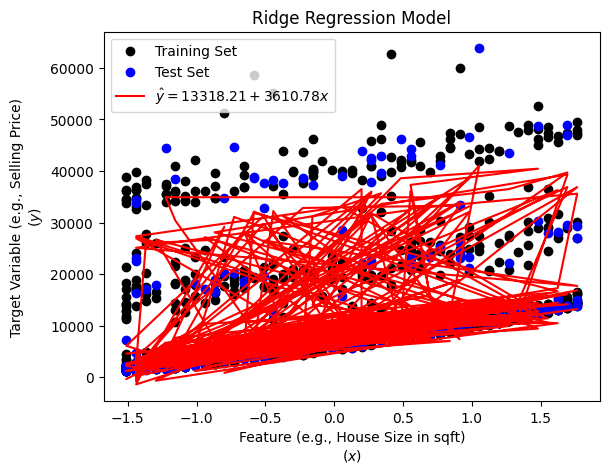

In [56]:
import matplotlib.pyplot as plt


model = ridge_best  

y_hat = model.intercept_ + np.dot(X_test_rfe, model.coef_)


plt.scatter(X_train_rfe[:, 0], y_train, color='black', label='Training Set')  # Modify for actual feature column
plt.scatter(X_test_rfe[:, 0], y_test, color='blue', label='Test Set')


plt.plot(X_test_rfe[:, 0], y_hat, color='red', label=rf'$\hat{{y}} = {round(model.intercept_, 2)} + {round(model.coef_[0], 2)}x$')


plt.xlabel('Feature (e.g., House Size in sqft)\n$(x)$')
plt.ylabel('Target Variable (e.g., Selling Price)\n$(y)$')
plt.title(f'{model.__class__.__name__} Regression Model')
plt.legend()

# Displaying the plot
plt.show()


In [57]:
import pandas as pd

y_hat = model.predict(X_test_rfe)

df_test = pd.DataFrame({
    'Feature (e.g., House Size)': X_test_rfe[:, 0],
    'Actual Value': y_test,
    'Predicted Value': y_hat
})

df_test


,"Feature (e.g., House Size)",Actual Value,Predicted Value
764,0.412467,9095.06825,8671.869708
887,-0.228344,5272.17580,7091.794013
890,1.765289,29330.98315,36878.276889
1293,0.483668,9301.89355,9542.227677
259,-1.438764,33750.29180,26958.282586
...,...,...,...
109,1.694088,47055.53210,39308.588223
575,1.338082,12222.89830,11814.340886
535,-0.085942,6067.12675,7379.123068
543,1.053277,63770.42801,41029.962769


In [58]:
from sklearn import metrics
import numpy as np

y_hat = model.predict(X_test_rfe)

mae = metrics.mean_absolute_error(y_test, y_hat)


mse = metrics.mean_squared_error(y_test, y_hat)


rmse = np.sqrt(mse)

r_squared = metrics.r2_score(y_test, y_hat)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R^2): {r_squared}")


Mean Absolute Error (MAE): 4212.570688446275
Mean Squared Error (MSE): 33938920.78098455
Root Mean Squared Error (RMSE): 5825.712040685203
R-squared Score (R^2): 0.7813900284088122


In [59]:
import numpy as np

X_new = np.array([[2000, 3, 1, 10, 5]])  

predicted_value = model.predict(X_new)


print(f"We can advise the developers to list the house for: ${round(predicted_value[0], 2)}")


We can advise the developers to list the house for: $7335682.92


In [60]:

x_value = 2000

print(f"w0 (Intercept) = {model.intercept_}")
print(f"w1 (Coefficient for the first feature) = {model.coef_[0]}")
print(f"x = {x_value}")
print(f"y = w0 + w1*x = {round(model.intercept_, 2)} + {round(model.coef_[0], 2)}*{x_value} = {round(model.intercept_ + model.coef_[0] * x_value, 2)}")


w0 (Intercept) = 13318.207082784416
w1 (Coefficient for the first feature) = 3610.775986184236
x = 2000
y = w0 + w1*x = 13318.21 + 3610.78*2000 = 7234870.18


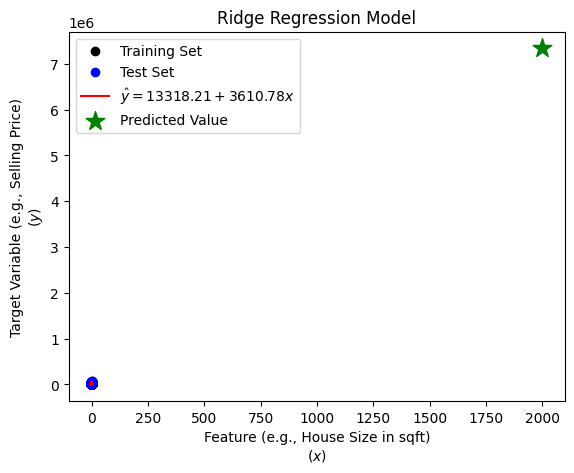

In [61]:
import matplotlib.pyplot as plt

y_hat = model.predict(np.vstack((X_train_rfe, X_test_rfe)))

X_new = np.array([[2000, 3, 1, 10, 5]])  
predicted_value = model.predict(X_new)[0]


plt.scatter(X_train_rfe[:, 0], y_train, color='black', label='Training Set') 
plt.scatter(X_test_rfe[:, 0], y_test, color='blue', label='Test Set')

plt.plot(np.vstack((X_train_rfe, X_test_rfe))[:, 0], y_hat, color='red', 
         label=rf'$\hat{{y}} = {round(model.intercept_, 2)} + {round(model.coef_[0], 2)}x$')

plt.scatter(X_new[0, 0], predicted_value, color='green', marker='*', s=200, zorder=5, label='Predicted Value')

plt.xlabel('Feature (e.g., House Size in sqft)\n$(x)$')
plt.ylabel('Target Variable (e.g., Selling Price)\n$(y)$')
plt.title(f'{model.__class__.__name__} Regression Model')
plt.legend()

plt.show()
